## 📰 Novelty Detection in News Project

### Introduction
This project aims to develop a novelty detection system applied to sports news. Novelty detection is a machine learning task that identifies new content by comparing it to previously known information.

### 📝 Dataset
We use the **LREC2018 corpus** in the "SPORTS" category, organized by events in subfolders:

- `source` folder: Contains 3 initial articles.
- `target` folder: Contains additional articles labeled as "novel" or "non-novel" in relation to the source articles. These articles will be used to determine if they contain new information (novel) compared to the `source` articles.

### 🔜 Tasks
1. **Novelty Detection**  
   ⚠️ Identify `novel` and `non-novel` news articles by assessing the information in each target article relative to the source articles.

2. **System Development**  
   ⚠️ Develop a system that uses the `source` folder to distinguish between `novel` and `non-novel` information in the new articles within the `target` folder. This involves creating a model that can reliably recognize new information based on content changes detected through `novelty detection algorithms`.

3. **Evaluation and Comparison**  
   ⚠️ Compare the system's results with the `Document Level Annotation (DLA)` attribute in each target article to assess the model’s accuracy using the f1-score. This comparison will validate the system’s ability to label articles accurately as "novel" or "non-novel."

4.   Analise de topicos para entender as diferenças entre os novelty e o não


Each article has a `.txt` file with the content and an accompanying `.xml` file containing metadata such as title, publication date, publisher, and other event-related information.



-----

### Libs

In [1]:
from scripts.parser import CorpusParser 
import os
import pandas as pd

base_dir = os.getcwd()
corpus_dir = os.path.join(base_dir, 'database', 'TAP-DLND-1.0_LREC2018')

parser = CorpusParser(corpus_dir)
df_news = parser.parse()
df_news

category event_id        news_id  \
0      SPORTS  SPTE001  SPTE001SRC003   
1      SPORTS  SPTE001  SPTE001SRC001   
2      SPORTS  SPTE001  SPTE001SRC002   
3      SPORTS  SPTE001  SPTE001TGT011   
4      SPORTS  SPTE001  SPTE001TGT002   
...       ...      ...            ...   
6099     GOVT  GOVE008  GOVE008TGT030   
6100     GOVT  GOVE008  GOVE008TGT031   
6101     GOVT  GOVE008  GOVE008TGT007   
6102     GOVT  GOVE008  GOVE008TGT009   
6103     GOVT  GOVE008  GOVE008TGT014   

                                                content  is_source  \
0     Dangal: Baba Ramdev to wrestle it out with Rus...       True   
1     Even as the Pro Wrestling League continues, wh...       True   
2     
In the ongoing Pro Wrestling League, Haryana ...       True   
3      Yoga guru Baba Ramdev displayed his wrestling...      False   
4       
Yoga guru Baba Ramdev displayed his wrestli...      False   
...                                                 ...        ...   
6099  ﻿ Prime Minister Narendra Modi will inaugurate...      False   
6100  ﻿Narendra Modi addresses rally in Udhampur. 
J...      False   
6101   
Union Road and Transport Minister Nitin Gadk...      False   
6102  ﻿ PM @narendramodi unveils Plaque to inaugurat...      False   
6103  Prime Minister Narendra Modi today championed ...      False   

             DOP             publisher  \
0     00/00/0000   www.indiatvnews.com   
1     00/00/0000        Indiatimes.com   
2     00/00/0000        www.news18.com   
3     00/00/0000  www.tribuneindia.com   
4     00/00/0000          u4uvoice.com   
...          ...                   ...   
6099  02/04/2017     www.newkerala.com   
6100  02/04/2017         indiatoday.in   
6101  02/04/2017      www.dnaindia.com   
6102  02/04/2017      www.dnaindia.com   
6103  02/04/2017                   src   

                                                  title   eventid  \
0     Dangal-Baba Ramdev to wrestle it out with Russ...   SPTE001   
1     Baba Ramdev Calls Out Olympic Wrestling Medall...   SPTE001   
2     Baba Ramdev Challenges Beijing Olympic Medalli...   SPTE001   
3                                                  <NA>  
SPTE001   
4                                                  <NA>  
SPTE001   
...                                                 ...       ...   
6099                                               <NA>  
GOVE008   
6100                                               <NA>  
GOVE008   
6101                                               <NA>  
GOVE008   
6102                                               <NA>  
GOVE008   
6103                                               <NA>  
GOVE008   

                            eventname   topic  sentence  words  \
0     Baba Ramdev wrestling challenge  SPORTS        13    269   
1     Baba Ramdev wrestling challenge  SPORTS         6     92   
2     Baba Ramdev wrestling challenge  SPORTS        14    267   
3     Baba Ramdev wrestling challenge  SPORTS        14    279   
4     Baba Ramdev wrestling challenge  SPORTS        11    243   
...                               ...     ...       ...    ...   
6099            Chenani-Nashri tunnel    GOVT        11    460   
6100            Chenani-Nashri tunnel    GOVT        13    427   
6101            Chenani-Nashri tunnel    GOVT        18    234   
6102            Chenani-Nashri tunnel    GOVT        13    413   
6103            Chenani-Nashri tunnel    GOVT        21    387   

                                       sourceid        DLA   SLNS  
0                                          <NA>       <NA>   <NA>  
1                                          <NA>       <NA>   <NA>  
2                                          <NA>       <NA>   <NA>  
3     SPTE001SRC001,SPTE001SRC002,SPTE001SRC003      Novel  66.07  
4     SPTE001SRC001,SPTE001SRC002,SPTE001SRC003      Novel  54.55  
...                                         ...        ...    ...  
6099  GOVE008SRC001,GOVE008SRC002,GOVE008SRC003  non-novel  50.00  


In [2]:
# from tabulate import tabulate
# print(tabulate(df_news, headers='keys', tablefmt='psql'))
# Contar los valores True y False en la columna 'is_source'


### Data Structure and Preprocessing news text


**tokenize / remove punctuation and stopwords**

In [3]:
from scripts.tokenize_and_normalize import tokenize_and_remove_punctuation, remove_stopwords

df_news['content_clean_tokenized'] = df_news['content'].apply(tokenize_and_remove_punctuation)
print(df_news['content_clean_tokenized'].iloc[0])

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mab0205/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mab0205/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


First 10 stopwords: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
['Dangal', 'Baba', 'Ramdev', 'to', 'wrestle', 'it', 'out', 'with', 'Russian', 'Olympic', 'medallist', 'Dangal', 'Baba', 'Ramdev', 'to', 'wrestle', 'it', 'out', 'with', 'Russian', 'Olympic', 'medallist', 'Currently', 'reading', 'Dangal', 'Baba', 'Ramdev', 'to', 'wrestle', 'it', 'out', 'with', 'Russian', 'Olympic', 'medallist', 'Baba', 'Ramdev', 'Wrestling', 'Yoga', 'guru', 'Ramdev', 'will', 'challenge', 'the', 'Olympic', 'for', 'a', 'friendly', 'wrestling', 'bout', 'ahead', 'of', 'the', 'second', 'semifinal', 'match', 'between', 'Mumbai', 'Maharathi', 'and', 'NCR', 'Punjab', 'Royals', 'in', 'the', 'Pro', 'Wrestling', 'League', 'The', 'eye', 'turning', 'match', 'is', 'scheduled', 'at', 'pm', 'today', 'in', 'New', 'Delhi', 'Indira', 'Gandhi', 'Indoor', 'Stadium', 'I', 'have', 'fought', 'bouts', 'with', 'national', 'level', 'wrestlers', 'But', 'playing', 'against', 'an', 'internationally', 'r

In [4]:
# Filtrar contenido sin stopwords
df_news['content_no_sw'] = df_news['content_clean_tokenized'].apply(remove_stopwords)
print('the length of the content:',len(df_news['content_clean_tokenized'].iloc[0]))
print('the length after cleaning:',len(df_news['content_no_sw'].iloc[0]))

the length of the content: 244
the length after cleaning: 147


**Lemmatization**
- The goal is to convert words to their base form to standardize the text data. Inside the script, we need the `spacy en_core_web_sm` model to apply the lemmatization function effectively to our corpus.


In [5]:
from scripts.lemmatize_text import lemmatize_text

df_news = lemmatize_text(df_news)
print('ORIGINAL CORPUS:\n',df_news['content'].iloc[0])
print('\nCORPUS CLEANED: \n',df_news['content_no_sw'].iloc[0])

ORIGINAL CORPUS:
 Dangal: Baba Ramdev to wrestle it out with Russian Olympic medallist Dangal: Baba Ramdev to wrestle it out with Russian Olympic medallist Currently reading: Dangal: Baba Ramdev to wrestle it out with Russian Olympic medallist #Baba Ramdev , #Wrestling   14:24:22] Yoga guru Ramdev will challenge the 2008 Olympic   for a friendly wrestling bout ahead of the second semifinal match between Mumbai Maharathi and NCR Punjab Royals, in the Pro Wrestling League. 
The eye turning match is scheduled at 6:30 pm today in New Delhi's Indira Gandhi Indoor Stadium. 
“I have fought bouts with national level wrestlers. But playing against an internationally renowned player will be more exciting. You will witness the real power of yoga in this match,” said Ramdev. 
Andrey is   for beating   at the Beijing Olympics. As Andrey reached the finals   
Before the 2nd semifinal on Wednesday, these two will play a friendly bout. Baba Ramdev says he does stamina building exercises daily and when

- After applying all the cleaning strategies, the newly processed corpus shows significant differences. This will enhance our exploratory analysis and improve model performance.


**Feature importance and remove non relevant features** 

In [6]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6104 entries, 0 to 6103
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   category                 6104 non-null   string
 1   event_id                 6104 non-null   string
 2   news_id                  6104 non-null   string
 3   content                  6104 non-null   string
 4   is_source                6104 non-null   bool  
 5   DOP                      6104 non-null   string
 6   publisher                6104 non-null   string
 7   title                    669 non-null    string
 8   eventid                  6104 non-null   string
 9   eventname                6104 non-null   string
 10  topic                    6104 non-null   string
 11  sentence                 6104 non-null   Int64 
 12  words                    6104 non-null   Int64 
 13  sourceid                 5435 non-null   string
 14  DLA                      5435 non-null  

In [7]:
from scripts.drop_feature import drop_constant_columns

drop_constant_columns(df_news)

Column 'content_clean_tokenized' was skipped due to unhashable data types.
No columns were dropped. All columns have multiple unique values or unhashable types.


In [8]:
df_news[:3]

category event_id        news_id  \
0   SPORTS  SPTE001  SPTE001SRC003   
1   SPORTS  SPTE001  SPTE001SRC001   
2   SPORTS  SPTE001  SPTE001SRC002   

                                             content  is_source         DOP  \
0  Dangal: Baba Ramdev to wrestle it out with Rus...       True  00/00/0000   
1  Even as the Pro Wrestling League continues, wh...       True  00/00/0000   
2  
In the ongoing Pro Wrestling League, Haryana ...       True  00/00/0000   

             publisher                                              title  \
0  www.indiatvnews.com  Dangal-Baba Ramdev to wrestle it out with Russ...   
1       Indiatimes.com  Baba Ramdev Calls Out Olympic Wrestling Medall...   
2       www.news18.com  Baba Ramdev Challenges Beijing Olympic Medalli...   

   eventid                        eventname   topic  sentence  words sourceid  \
0  SPTE001  Baba Ramdev wrestling challenge  SPORTS        13    269     <NA>   
1  SPTE001  Baba Ramdev wrestling challenge  SPORTS         6     92     <NA>   
2  SPTE001  Baba Ramdev wrestling challenge  SPORTS        14    267     <NA>   

    DLA  SLNS                            content_clean_tokenized  \
0  <NA>  <NA>  [Dangal, Baba, Ramdev, to, wrestle, it, out, w...   
1  <NA>  <NA>  [Even, as, the, Pro, Wrestling, League, contin...   
2  <NA>  <NA>  [In, the, ongoing, Pro, Wrestling, League, Har...   

                                       content_no_sw  
0  dangal baba ramdev wrestle russian olympic med...  
1  pro wrestling league continue draw interest ma...  
2  ongoing pro wrestling league haryana hammers j...

- Looking at the variavels, its not interesting using the ids and the title beacause just 6 non-null

In [9]:
df_news.drop(columns=['event_id', 'news_id', 'eventid', 'sourceid', 'title', 'DOP', 'eventname' , 'SLNS'], inplace=True)
print("Columnas restantes en df_news: \n", df_news.columns)

Columnas restantes en df_news: 
 Index(['category', 'content', 'is_source', 'publisher', 'topic', 'sentence',
       'words', 'DLA', 'content_clean_tokenized', 'content_no_sw'],
      dtype='object')


- Dropped  'DOP', 'eventname' and 'topic'
- I didn't find the meaning or what SLNS measures, so removing it might be the best solution because it's difficult to handle the weight of the feature if its representation isn't clear.

- After processing the corpus, it is no longer necessary to use the columns `content_clean_tokenized` and `content`.

In [10]:
df_news.drop(columns=['content_clean_tokenized', 'content'], inplace=True)
print("Columnas restantes en df_news: \n", df_news.columns)

Columnas restantes en df_news: 
 Index(['category', 'is_source', 'publisher', 'topic', 'sentence', 'words',
       'DLA', 'content_no_sw'],
      dtype='object')


- But, what's the content of DLA column? 

In [11]:
counts = df_news['DLA'].value_counts(normalize=True) * 100

print("Percentage of each category in the 'DLA' column:")
for category, percentage in counts.items():
    print(f"{category}: {percentage:.2f}%")

Percentage of each category in the 'DLA' column:
Non-Novel: 43.61%
Novel: 42.39%
non-novel: 7.95%
novel: 6.02%
Non-Novelvel: 0.02%
NovNon-Novelel: 0.02%


**Analysis Insight:**

This information is particularly interesting because we can use `DLA` as an identifier to label news as either "Novel" or "Non-Novel." We will train our model using the `source` news as the training set and the `target` news as the test set. Finally, we’ll compare the results to evaluate how well our model identifies the novelty of new items.


In [12]:
df_news[:3]

category  is_source            publisher   topic  sentence  words   DLA  \
0   SPORTS       True  www.indiatvnews.com  SPORTS        13    269  <NA>   
1   SPORTS       True       Indiatimes.com  SPORTS         6     92  <NA>   
2   SPORTS       True       www.news18.com  SPORTS        14    267  <NA>   

                                       content_no_sw  
0  dangal baba ramdev wrestle russian olympic med...  
1  pro wrestling league continue draw interest ma...  
2  ongoing pro wrestling league haryana hammers j...

- There are 6 null values in the `SLNS` and `DLA` columns. I will check the correlation to assess their importance and determine the best technique to handle this issue. Options include removing the data, using it for testing, or filling in the missing values.

In [13]:
df_source = df_news[df_news['is_source'] == True]
df_target = df_news[df_news['is_source'] == False]

### Exploratory Analysis

- Visualization of variable distribution
- Principal Component Analysis (PCA)
- Latent Semantics and Topic Modeling
- Correlation between variables
- A temporal analysis was not possible due to the lack of temporal data, so our task will be solely focused on classifying new data in relation to target data.

**Variable Distribution**

669 5435


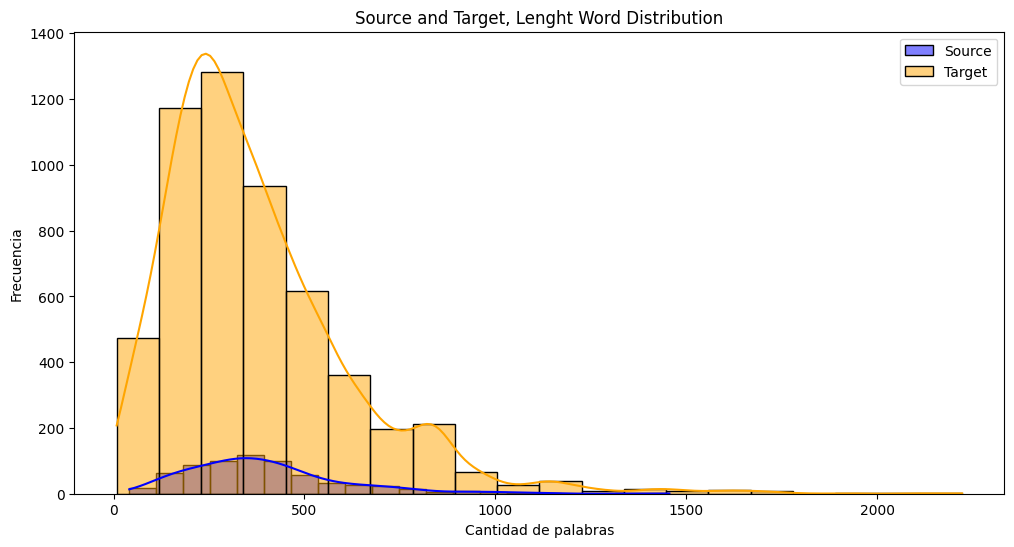

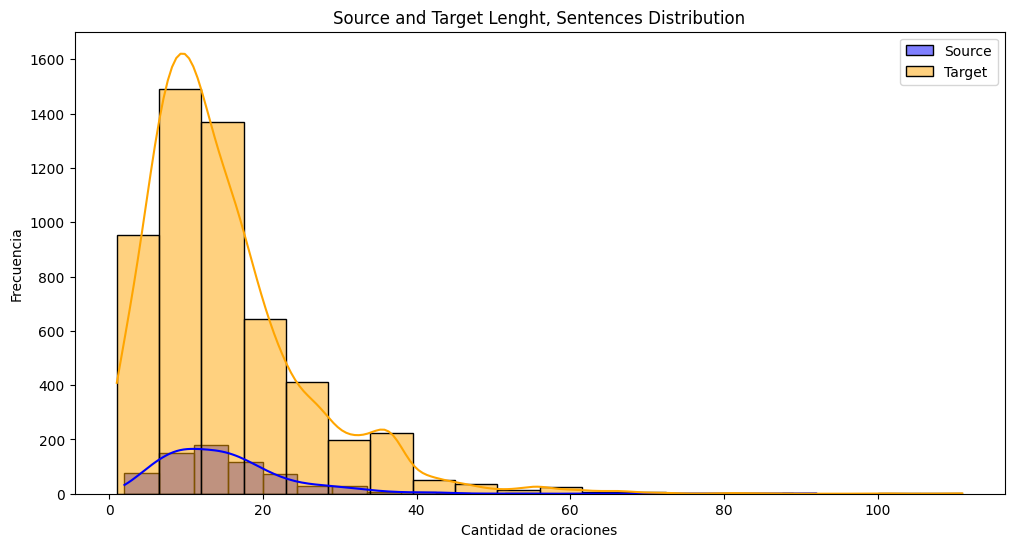

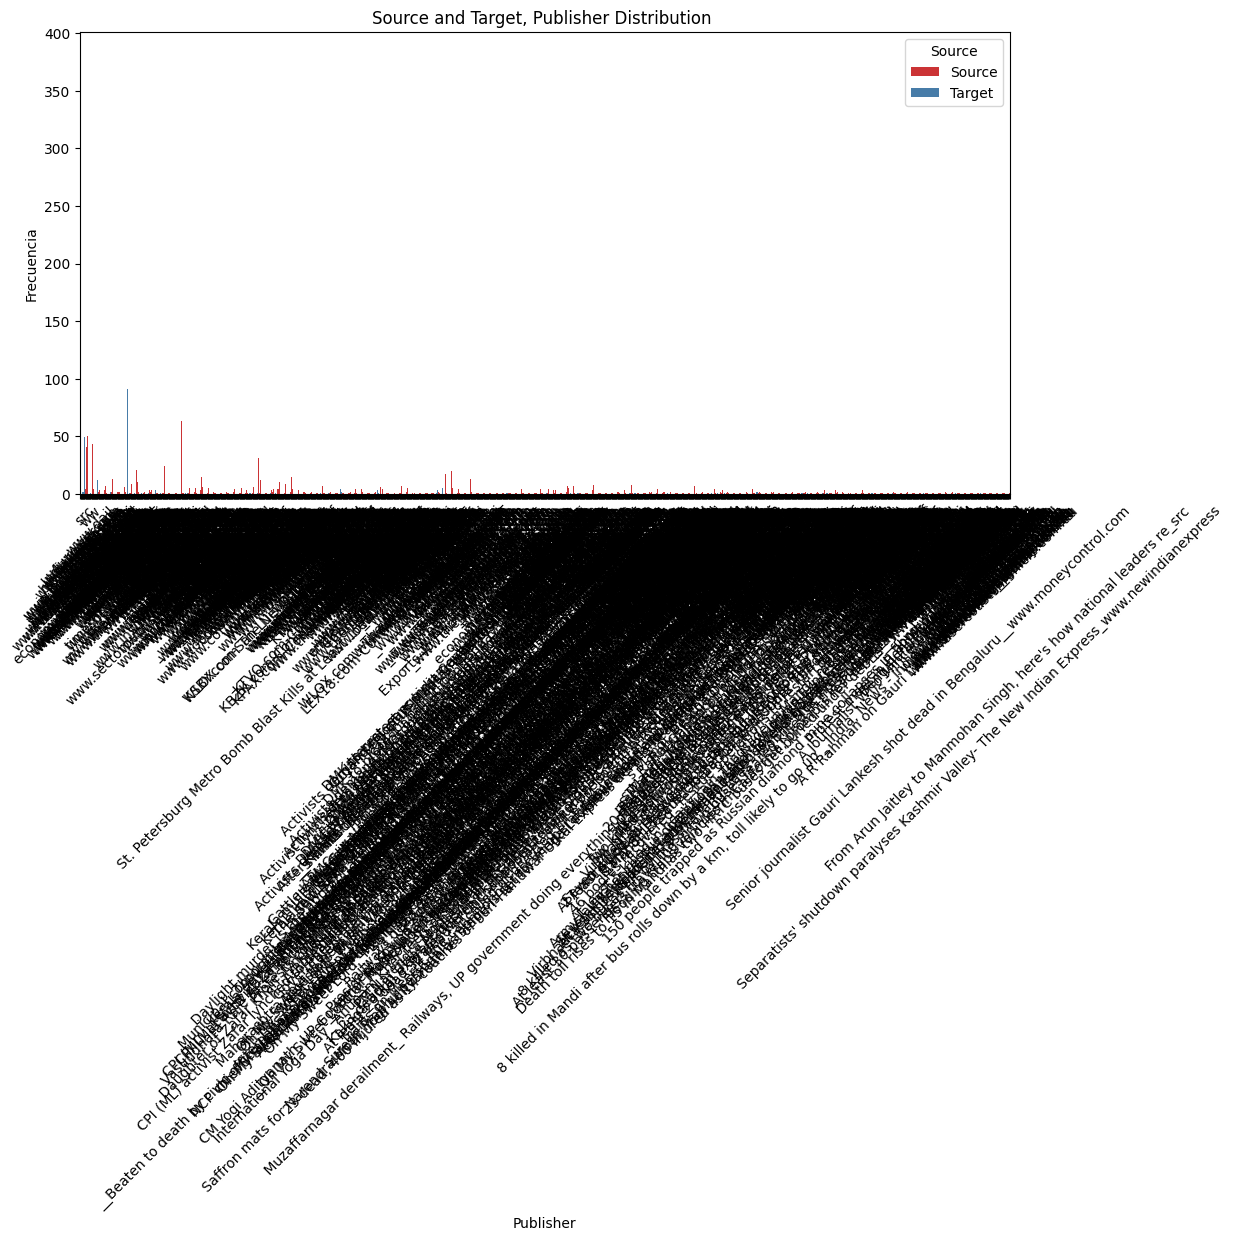

In [14]:
from Exploratory_Analysis.variable_distribution import len_words_distribution, count_sentences_distribution, publisher_distribution
print(len(df_source),len(df_target))
len_words_distribution(df_source, df_target )
count_sentences_distribution(df_source, df_target )
publisher_distribution(df_news)

**Analysis Summary:**

- The word count and sentence count distributions show distinct patterns between `source` and `target`, suggesting structural differences that could be useful for novelty detection.
- The `publisher` feature shows minimal repetition and likely introduces noise, so it may be better to exclude it. This feature could introduce noise because the model may think that a new article from a new publisher is associated with novelty. However, in this case, the dataset doesn't have titles for all of the articles, so we can't combine the title and article as a feature. Therefore, it's better to use only the corpus to identify novelty based on the content.

In [15]:
df_news.drop(columns=['publisher'], inplace=True)
print("Columnas restantes en df_news: \n", df_news.columns)

Columnas restantes en df_news: 
 Index(['category', 'is_source', 'topic', 'sentence', 'words', 'DLA',
       'content_no_sw'],
      dtype='object')



**Next Steps:**
- Extract word and sentence count as additional features to analise if that could be interesting in our analise (PCA).
- Explore other text features like keyword frequency.

###  Principal Component Analises (PCA)
-  PCA transforms the original variables into a new set of variables called principal components, which are orthogonal (uncorrelated) and ordered by the amount of variance they capture from the data. Se below how the original variables are now transformed into the same number of components.

In [16]:
from Exploratory_Analysis.pca import pca_analises
from sklearn.preprocessing import StandardScaler
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.preprocessing import StandardScaler

- Selecting Characteristics for Analysis

In [17]:
null_count_dla = df_news['DLA'].isna().sum()
print(f"Number of rows with NaN in 'DLA': {null_count_dla}")

Number of rows with NaN in 'DLA': 669


- That NaN in DLA are the Source registers. So I'm gonna fill the NaN with ``Non-Novel``

In [18]:
df_news['DLA'].fillna('Non-Novel', inplace=True)

df_news['DLA'] = df_news['DLA'].apply(lambda x: 1 if x == 'Novel' else 0) # reaplace Novel -> 1 ... Non-Novel -> 0 

# Features for PCA
features = ['sentence', 'words']
df_news[features] = df_news[features].astype(float)

df_news[:3]

/tmp/ipykernel_27103/2421769514.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_news['DLA'].fillna('Non-Novel', inplace=True)


category  is_source   topic  sentence  words  DLA  \
0   SPORTS       True  SPORTS      13.0  269.0    0   
1   SPORTS       True  SPORTS       6.0   92.0    0   
2   SPORTS       True  SPORTS      14.0  267.0    0   

                                       content_no_sw  
0  dangal baba ramdev wrestle russian olympic med...  
1  pro wrestling league continue draw interest ma...  
2  ongoing pro wrestling league haryana hammers j...

* Normalizing Data

In [19]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(df_news[features])

**Box Plot Analysis after Normalizing Data**

<Axes: >

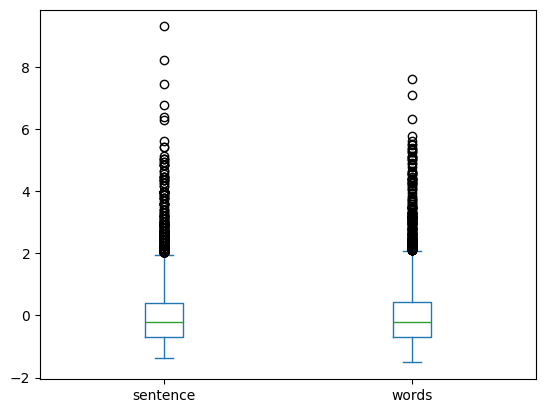

In [20]:
df_normalized = pd.DataFrame(X_normalized, columns=features)

df_normalized[['sentence', 'words']].plot.box()

- The boxplot shows that both sentence and words features are centered around the mean with similar variability, and both contain some outliers, indicating articles with higher word or sentence counts. 
- **These outliers could potentially be associated with novel content, making them worth further investigation.**

           PC1       PC2
0    -0.449511  0.173052
1    -1.444786  0.208194
2    -0.386751  0.247455
3    -0.351822  0.212525
4    -0.662353  0.111571
...        ...       ...
6099 -0.030713 -0.520069
6100  0.010393 -0.286851
6101 -0.208483  0.617834
6102 -0.030358 -0.246100
6103  0.442609  0.378228

[6104 rows x 2 columns]


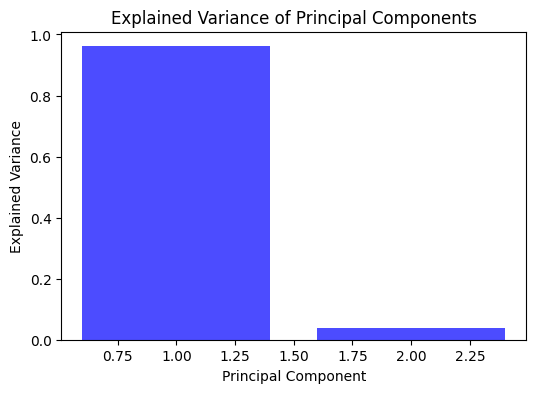


               PC1       PC2
sentence  0.707107  0.707107
words     0.707107 -0.707107


In [21]:
df_pca = pca_analises(X_normalized,features)

- **The first component** captures approximately **80%** of the variance, it is recommended to use only the first component and discard the original features, at least as an initial test. This approach would reduce dimensionality and could simplify the model without losing much information.

In [22]:
df_pca

PC1       PC2
0    -0.449511  0.173052
1    -1.444786  0.208194
2    -0.386751  0.247455
3    -0.351822  0.212525
4    -0.662353  0.111571
...        ...       ...
6099 -0.030713 -0.520069
6100  0.010393 -0.286851
6101 -0.208483  0.617834
6102 -0.030358 -0.246100
6103  0.442609  0.378228

[6104 rows x 2 columns]

In [23]:
# Reindxing
df_news.reset_index(drop=True, inplace=True)
df_pca.reset_index(drop=True, inplace=True)

df_news = pd.merge(df_news, df_pca[['PC1']], left_index=True, right_index=True, how='left')

df_news.drop(columns=['sentence', 'words'], inplace=True)

print(df_news.columns)
print(df_news.shape)

Index(['category', 'is_source', 'topic', 'DLA', 'content_no_sw', 'PC1'], dtype='object')
(6104, 6)


**Latent Semantic Analysis (LSA)** - LDA 
- technique  that helps to uncover the hidden (latent) relationships between words in a large corpus of text.
- Analysis of Variance in Text Data:
Evaluating the variance of extracted text features (such as TF-IDF or embeddings) can indicate how diverse the content is within source and target. If target shows greater variance, this could support the hypothesis that it contains novel information.

- First is necessary know the number of topics and the number of documents for each topic to identify the best estrategy for latent Analysis

In [24]:

num_topics = df_news['topic'].nunique()
print(f"Number of unique topics: {num_topics}")

topic_counts = df_news['topic'].value_counts()
print("Number of documents per topic:")
print(topic_counts)

Number of unique topics: 11
Number of documents per topic:
topic
POLITICS      1641
TERROR         776
ARTS           718
BUSINESS       571
ACCIDENT       533
GOVT           500
CRIME          441
NATURE         367
SOCIETY        292
GOVERNMENT     169
SPORTS          96
Name: count, dtype: Int64


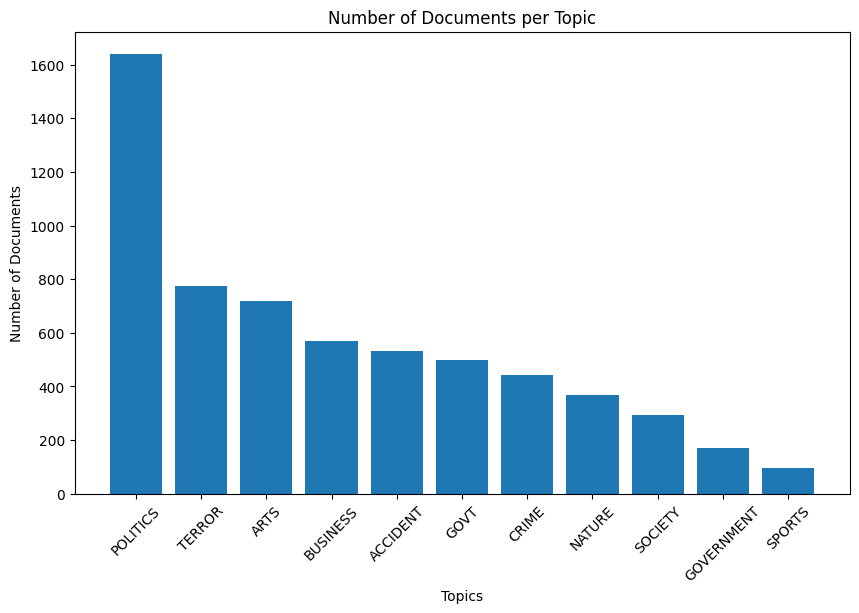

In [25]:
from Exploratory_Analysis.topics_plot import plot_topic_counts
topic_counts = df_news['topic'].value_counts().to_dict()

plot_topic_counts(topic_counts)

- Knowing that there are s11 categories that have diferente quantity documents Im gonna establish an arbitary value for num_topics that im going to generate

CoherenceModel is also going to be analised 

In [26]:
from Exploratory_Analysis.lda import lda_on_all_documents , preprocess_text_dual , visualize_lda

df_with_topics, lda_model, corpus, dictionary = lda_on_all_documents(df_news,  text_column='content_no_sw' , num_topics=11)


[nltk_data] Downloading package punkt to /home/mab0205/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mab0205/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Coherence Score: 0.4943242747589185


In [27]:
df_with_topics.columns

Index(['category', 'is_source', 'topic', 'DLA', 'content_no_sw', 'PC1',
       'tokens', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4',
       'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10'],
      dtype='object')

**Analyse Bag words for each topic**

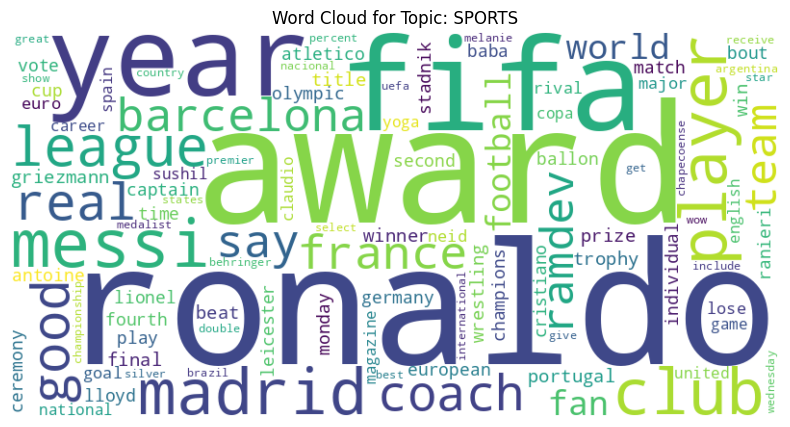

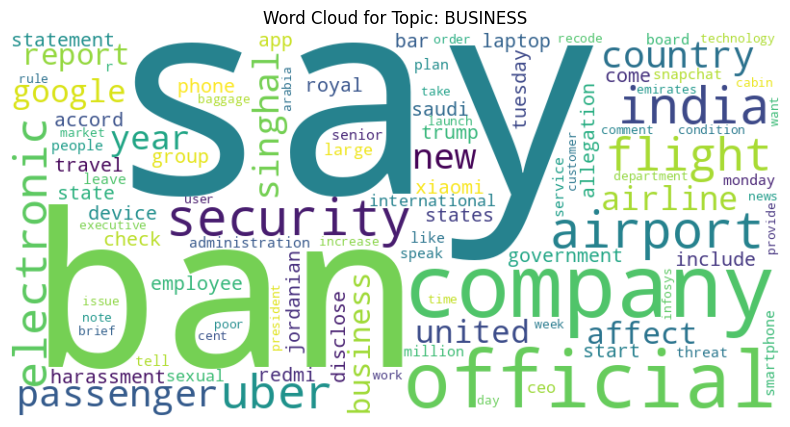

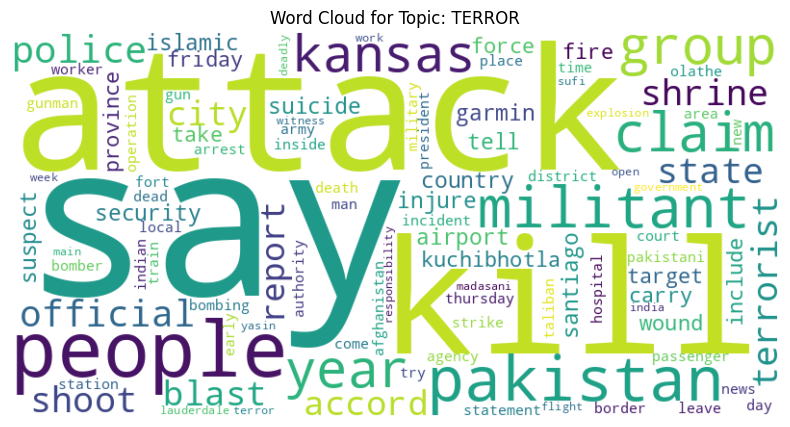

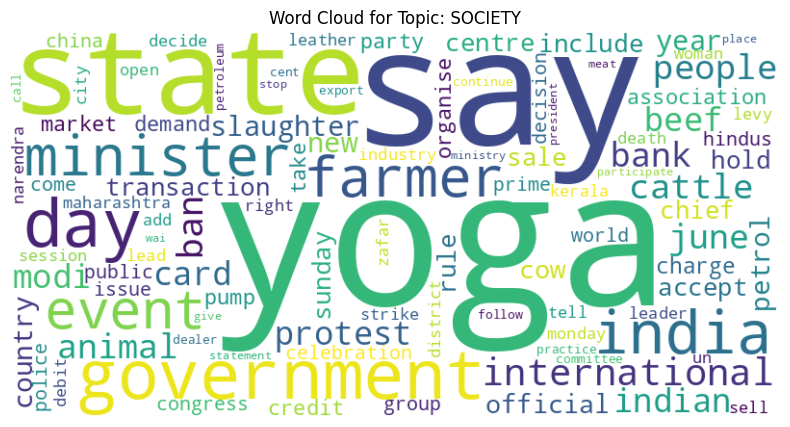

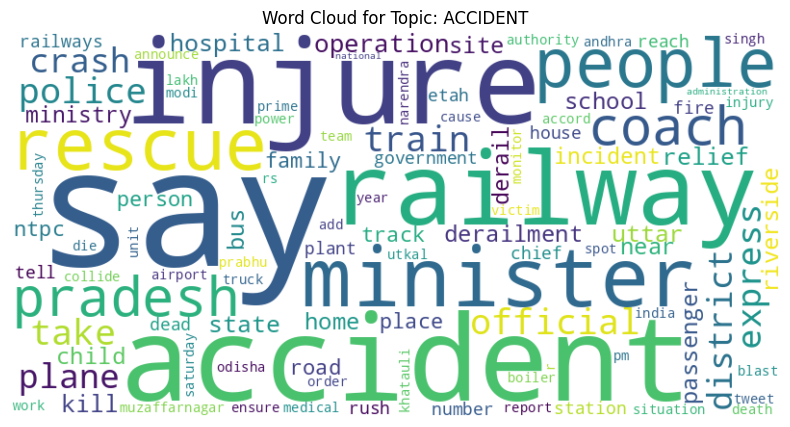

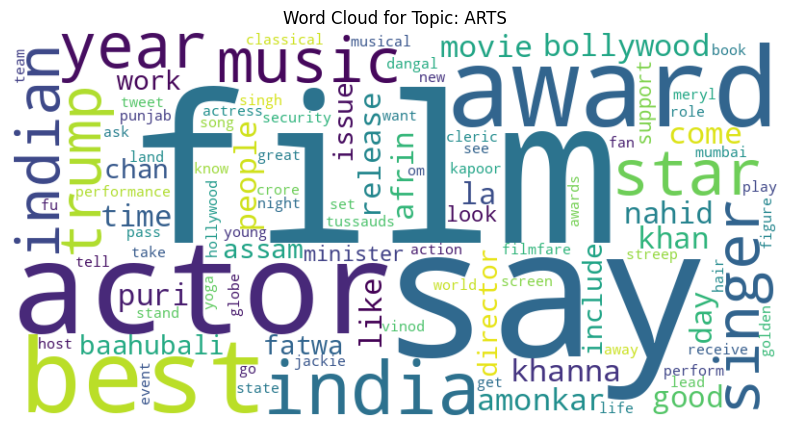

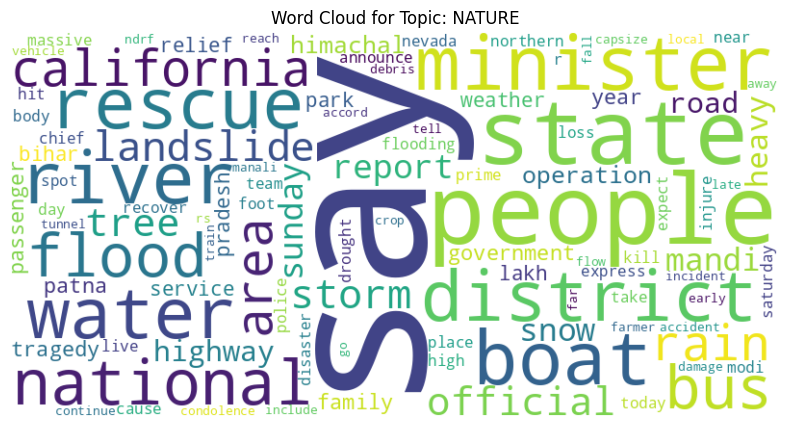

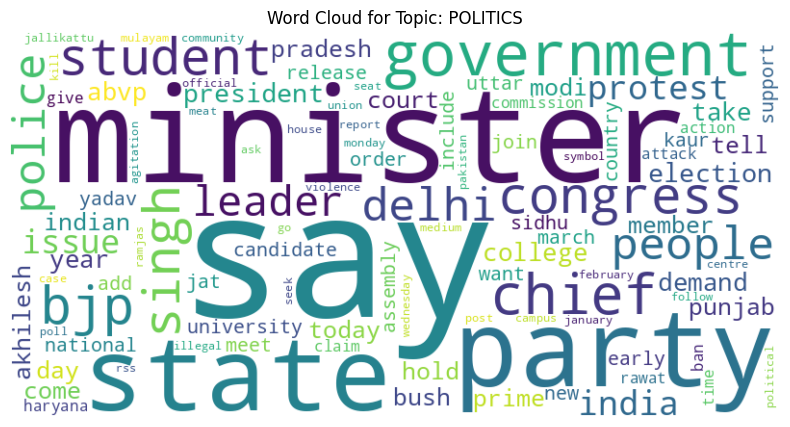

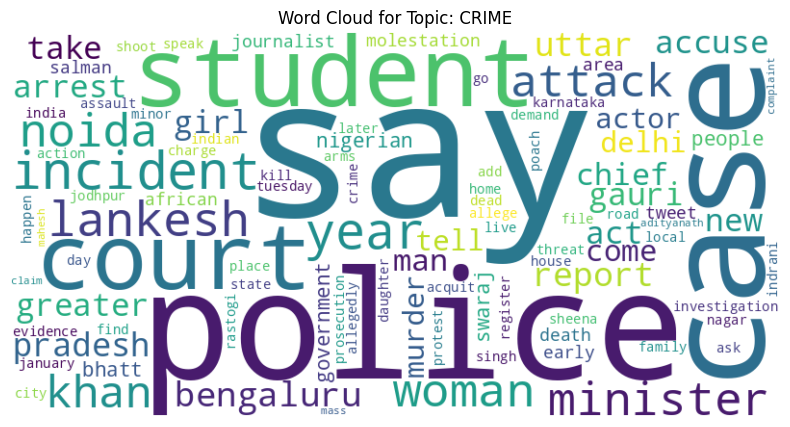

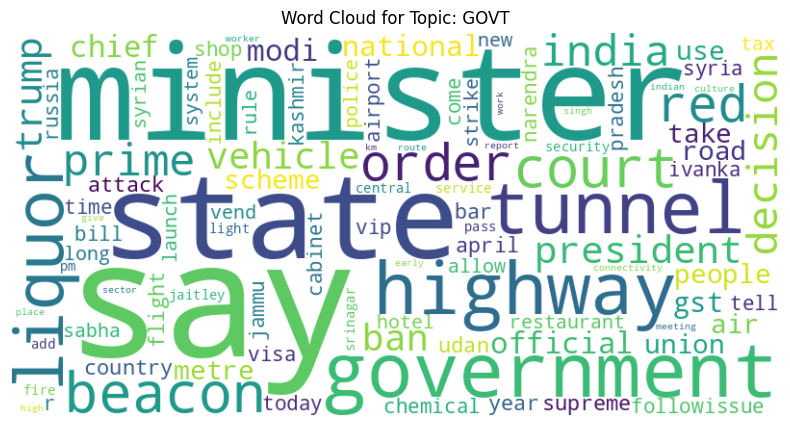

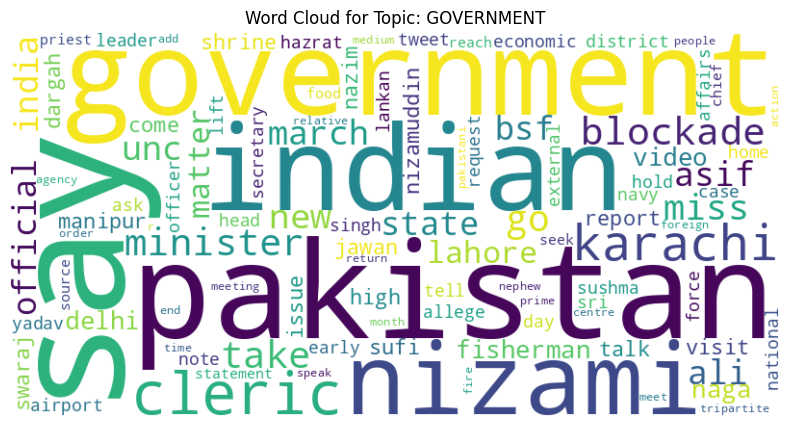

In [28]:
from scripts.generate_words_cloud import plot_word_clouds_by_topic
plot_word_clouds_by_topic(df_with_topics, token_column='tokens', topic_column='topic')

- After seen the bag of words the word 'say' is really frequent so Im gonna retrain the model without the word 

In [29]:
custom_stopwords = ['say', 'said', 'says', 'told']

# Preprocess the text
df_aux = preprocess_text_dual(df_news, text_column='content_no_sw', custom_stopwords=custom_stopwords)

In [30]:
df_aux.columns

Index(['category', 'is_source', 'topic', 'DLA', 'content_no_sw', 'PC1',
       'tokens', 'cleaned_text', 'full_text'],
      dtype='object')

In [31]:
df_corrected, lda_model, corpus, dictionary = lda_on_all_documents(df_aux, text_column='cleaned_text', num_topics=11)

Coherence Score: 0.4760963744369787


- the coherence score is less because with out a commun word is normal to be reduzed, afterall the values between 3-6 are considered ok 

In [ ]:
plot_word_clouds_by_topic(df_corrected, token_column='tokens', topic_column='topic')

- To analyse the data I investigate a way to analyse the LDA and we’ll use a popular visualization package, pyLDAvis which is designed to help interactively 

In [ ]:
# Visualize LDA
LDAvis_prepared = visualize_lda(
    lda_model=lda_model,
    corpus=corpus,
    id2word=dictionary,
    num_topics=11,
    output_dir='./results'
)

In [34]:
# Split the data into training and test sets
train_df = df_corrected[df_corrected['is_source'] == True].reset_index(drop=True)
test_df = df_corrected[df_corrected['is_source'] == False].reset_index(drop=True)

- Document embeddings using full_text for Sentence-BERT

In [38]:
from Exploratory_Analysis.document_embeddings import generate_embeddings

train_embeddings = generate_embeddings(df=train_df, text_column='full_text')
test_embeddings = generate_embeddings(df=test_df, text_column='full_text')

/home/mab0205/miniconda3/envs/tf/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### MODELS AND NOVELTY DETECTION

In [45]:
train_df.columns

Index(['category', 'is_source', 'topic', 'DLA', 'content_no_sw', 'PC1',
       'tokens', 'cleaned_text', 'full_text', 'topic_0', 'topic_1', 'topic_2',
       'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8',
       'topic_9', 'topic_10'],
      dtype='object')

In [46]:
len(train_df)

669

### Cosine Similarity

In [54]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import classification_report
import numpy as np

def detect_novelty_cosine(train_embeddings, test_embeddings, threshold=0.5):
    """
    Detect novelty using cosine similarity.
    """
    # Ensure embeddings are in numpy format
    train_embeddings = train_embeddings.cpu().numpy()
    test_embeddings = test_embeddings.cpu().numpy()

    # Compute cosine similarity
    similarities = cosine_similarity(test_embeddings, train_embeddings)
    novelty_scores = 1 - np.max(similarities, axis=1)  # Higher score = more novel
    predictions = (novelty_scores > threshold).astype(int)
    return predictions, novelty_scores



### Local Outlier Factor (LOF)

In [57]:
from sklearn.neighbors import LocalOutlierFactor

def detect_novelty_lof(train_embeddings, test_embeddings, n_neighbors=20):
    """
    Detect novelty using Local Outlier Factor (LOF).
    """
    # Ensure embeddings are in numpy format
    train_embeddings = train_embeddings.cpu().numpy()
    test_embeddings = test_embeddings.cpu().numpy()

    # Fit LOF model on training data
    lof = LocalOutlierFactor(n_neighbors=n_neighbors, novelty=True)
    lof.fit(train_embeddings)

    # Predict novelty on test data
    predictions = lof.predict(test_embeddings)  # -1 = Novelty, 1 = Inlier
    predictions = (predictions == -1).astype(int)  # Convert to binary
    novelty_scores = -lof.decision_function(test_embeddings)  # Higher = more novel

    return predictions, novelty_scores


### Autoencoder

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

def build_autoencoder(input_dim):
    """
    Build a simple autoencoder model.
    """
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dense(32, activation='relu'),
        Dense(64, activation='relu'),
        Dense(input_dim, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def detect_novelty_autoencoder(train_embeddings, test_embeddings, epochs=50, batch_size=32, threshold=None):
    """
    Detect novelty using an autoencoder.
    """
    # Ensure embeddings are in numpy format
    train_embeddings = train_embeddings.cpu().numpy()
    test_embeddings = test_embeddings.cpu().numpy()

    # Normalize data
    scaler = MinMaxScaler()
    train_embeddings = scaler.fit_transform(train_embeddings)
    test_embeddings = scaler.transform(test_embeddings)

    # Build and train the autoencoder
    input_dim = train_embeddings.shape[1]
    autoencoder = build_autoencoder(input_dim)
    autoencoder.fit(train_embeddings, train_embeddings, epochs=epochs, batch_size=batch_size, verbose=0)

    # Reconstruction error
    reconstructions = autoencoder.predict(test_embeddings)
    reconstruction_errors = np.mean(np.square(test_embeddings - reconstructions), axis=1)

    # Define novelty threshold if not provided
    if threshold is None:
        threshold = np.percentile(reconstruction_errors, 95)  # Top 5% as novelty

    predictions = (reconstruction_errors > threshold).astype(int)
    return predictions, reconstruction_errors



### Evaluation

In [52]:
def evaluate_novelty(y_true, predictions):
    """
    Evaluate novelty detection results.
    """
    print(classification_report(y_true, predictions))


In [62]:
# Ground truth labels
y_test = test_df['DLA']

# Cosine Similarity
cosine_preds, cosine_scores = detect_novelty_cosine(train_embeddings, test_embeddings, threshold=0.5)
print("Cosine Similarity Results:")
evaluate_novelty(y_test, cosine_preds)

# Local Outlier Factor (LOF)
lof_preds, lof_scores = detect_novelty_lof(train_embeddings, test_embeddings, n_neighbors=20)
print("Local Outlier Factor Results:")
evaluate_novelty(y_test, lof_preds)

# Autoencoder
# Forzar uso de CPU
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

autoencoder_preds, autoencoder_scores = detect_novelty_autoencoder(train_embeddings, test_embeddings, epochs=50)
print("Autoencoder Results:")
evaluate_novelty(y_test, autoencoder_preds)

Cosine Similarity Results:
              precision    recall  f1-score   support

           0       0.58      1.00      0.73      3131
           1       0.53      0.00      0.01      2304

    accuracy                           0.58      5435
   macro avg       0.55      0.50      0.37      5435
weighted avg       0.56      0.58      0.42      5435

Local Outlier Factor Results:
              precision    recall  f1-score   support

           0       0.58      1.00      0.73      3131
           1       0.00      0.00      0.00      2304

    accuracy                           0.58      5435
   macro avg       0.29      0.50      0.37      5435
weighted avg       0.33      0.58      0.42      5435



/home/mab0205/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mab0205/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mab0205/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

FailedPreconditionError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "/home/mab0205/miniconda3/envs/tf/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/home/mab0205/miniconda3/envs/tf/lib/python3.10/runpy.py", line 86, in _run_code

  File "/home/mab0205/miniconda3/envs/tf/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/mab0205/miniconda3/envs/tf/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/mab0205/miniconda3/envs/tf/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/mab0205/miniconda3/envs/tf/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/home/mab0205/miniconda3/envs/tf/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/home/mab0205/miniconda3/envs/tf/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/home/mab0205/miniconda3/envs/tf/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/home/mab0205/miniconda3/envs/tf/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/mab0205/miniconda3/envs/tf/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/mab0205/miniconda3/envs/tf/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/mab0205/miniconda3/envs/tf/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/mab0205/miniconda3/envs/tf/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/mab0205/miniconda3/envs/tf/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/mab0205/miniconda3/envs/tf/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/mab0205/miniconda3/envs/tf/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/home/mab0205/miniconda3/envs/tf/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/home/mab0205/miniconda3/envs/tf/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/mab0205/miniconda3/envs/tf/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/home/mab0205/miniconda3/envs/tf/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/home/mab0205/miniconda3/envs/tf/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_27103/975066426.py", line 19, in <module>

  File "/tmp/ipykernel_27103/2133391819.py", line 34, in detect_novelty_autoencoder

  File "/home/mab0205/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/mab0205/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/home/mab0205/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

DNN library initialization failed. Look at the errors above for more details.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_one_step_on_iterator_3096]

In [63]:
import tensorflow as tf
print("Available devices:", tf.config.list_physical_devices())


Available devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
# Detect novelty based on cosine similarity
predictions, novelty_scores = detect_novelty(train_embeddings, test_embeddings, threshold=0.5)

# Evaluate the results using the true labels
y_test = test_df['DLA']
evaluate_novelty(y_test, predictions)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Cargar tus datos en un DataFrame
df = df_with_topics

# Separar características y eliminar columnas irrelevantes para el modelo
features = [col for col in df.columns if col.startswith('topic_') or col == 'PC1']
X_train = df[df['is_source'] == True][features]
X_test = df[df['is_source'] == False][features]
y_test = df[df['is_source'] == False]['DLA']  # Solo para evaluar después, no se usa en el entrenamiento


LocalOutlierFactor ( which is a popular method for outlier detection.)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, [0] * len(X_train))  # Etiqueta ficticia para aprender solo la distribución

# Predecir "novedad" en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Results")
print(classification_report(y_test, y_pred_rf))


autoencoder

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Definir el Autoencoder
input_dim = X_train.shape[1]

input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)

decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=output_layer)

# Compilar el Autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Entrenar el Autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_split=0.1, verbose=1)


In [ ]:
from sklearn.metrics import classification_report

# Reconstrucción en el conjunto de prueba
X_test_reconstructed = autoencoder.predict(X_test)

# Calcular el error de reconstrucción (usando MSE por ejemplo)
reconstruction_errors = np.mean(np.square(X_test - X_test_reconstructed), axis=1)

# Determinar el umbral de novedad (puedes ajustar este valor con experimentos)
threshold = np.percentile(reconstruction_errors, 90)  # Por ejemplo, el percentil 90 del error en los datos de prueba

# Clasificar como novedoso si el error de reconstrucción es mayor que el umbral
y_pred_autoencoder = (reconstruction_errors > threshold).astype(int)

# Evaluar el rendimiento usando la etiqueta DLA
print("Autoencoder Novelty Detection Results")
print(classification_report(y_test, y_pred_autoencoder))

coseno

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Calcular similitud de coseno entre cada documento de prueba y los documentos de entrenamiento
similarities = cosine_similarity(X_test, X_train)

# Calcular el puntaje de "novedad" (menos similar es más novedoso)
novelty_scores = 1 - similarities.max(axis=1)

# Clasificar como "novedoso" si el puntaje es mayor que un umbral (por ejemplo, 0.5)
threshold = 0.5
y_pred_cosine = (novelty_scores > threshold).astype(int)

print("Cosine Similarity Novelty Detection Results")
print(classification_report(y_test, y_pred_cosine))